In [5]:
## Till now : 1hr 37 mins..

## 

#### https://colab.research.google.com/drive/10XnBr7ccsssgERWnRdXHzHWsPOl0QI1G?usp=sharing#scrollTo=M6WNLHfwdgtv
### Have a eye -

#### https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming -->> Needs to explore for dynamic visuals

### Student doubt notebook
https://www.udemy.com/instructor/communication/qa/15327654/detail?course=3797306

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
### Before building some cool & fancy time series models, Lets perform some Analysis to understand Data

# 1.. Lets Prepare our data !
    Let's read the data from the "GlobalTemperatures.csv" file, 
    which has a monthly Earth’s temperature and plot it on the 
    chart.

In [8]:
global_temp = pd.read_csv(r"F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalTemperatures.csv")
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


### how to clean/prepare data :
    a.. remove duplicate rows
    b.. remove irrelevant data.
    c.. Fix structural errors.
    d.. check missing values in data
    e.. check data-type of each feature is right or not..
    f.. deal with the outliers

In [71]:
global_temp.duplicated().sum()

### ie no duplicated observations we have !

0

In [10]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [11]:
### date-type of 'dt' must be 'Date-time' bcz it holds date-time values..

'''
in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

'''

"\nin date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,\nns is basicaly nano second..\nBoth are similar , it entirely how your numpy was compiled..\n\nnp.dtype('datetime64[ns]') == np.dtype('<M8[ns]')\n\n"

In [12]:
global_temp['dt'][0]

'1750-01-01'

In [13]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [14]:
global_temp['dt'].dtype

dtype('<M8[ns]')

# 2.. Is there a global warming?  (previous 12:52 mins)
    

#### ie we need data like this 

          years	LandAverageTemperature	LandAverageTemperatureUncertainty	Uncertainty_top	    Uncertainty bottom
       	1750	    8.719364	             2.637818	                    11.357182	         6.081545
       	1751	    7.976143	             2.781143	                    10.757286	         5.195000
       	1752	    5.779833	             2.977000	                    8.756833	          2.802833
        
           1753	    8.388083	             3.176000	                    11.564083	         5.212083
           1754	    8.469333	             3.494250	                    11.963583	         4.975083

### now we have to extract year from 'dt' feature 
     so that we can show trend for each of the year ,
    so first & foremost we have to extract year from 'dt feature'..
    
    2 Ways to do it :
    a) convert 'dt' feature into date-time & then extract 'year' from it
    b) use your own code (its good for CS folk )
    

In [15]:
### follow  "2.. DA_uber_trip_featurization" for all the ways 

In [16]:
'''

def fetch_year(date):
    return date.split('-')[0]

global_temp['years']=global_temp['dt'].apply(fetch_year)

'''

"\n\ndef fetch_year(date):\n    return date.split('-')[0]\n\nglobal_temp['years']=global_temp['dt'].apply(fetch_year)\n\n"

In [17]:
global_temp['years']=global_temp['dt'].dt.year

In [18]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean'\
                      ,'LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [19]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':\
   'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


    bcz Maximum Uncertainty will be Avg temperature + 
                               deviation(Uncertainty)

    whereas minimum Uncertainty will be Avg temp - 
                            deviation(Uncertainty)

    and this deviation is exactly your Uncertainty...

### Uncertainty analysis (for yearly Time Series Data)
https://www.udemy.com/instructor/communication/qa/13929640/detail?course=3797306


### what is Uncertainity ?
https://www.udemy.com/instructor/communication/qa/14893658/detail?course=3797306

In [20]:
data['Uncertainty top']= data['LandAverageTemperature']\
            + data['LandAverageTemperatureUncertainty']

data['Uncertainty bottom']= data['LandAverageTemperature']\
             - data['LandAverageTemperatureUncertainty']

In [21]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


#### now we have to show trend (lineplot) ,we can think of using 
      lineplot doesnt matter what package we are using..
      
    a..plotly
    b..pandas
    c..matplotlib
    d..seaborn
    e..pygal

In [22]:
import plotly.express as px
fig=px.line(data,x="years",y=["Uncertainty top","Uncertainty bottom",\
  "LandAverageTemperature"],title="Average Land Temperature in World",\
            template="plotly_dark")
##fig.show()

In [23]:
### if plotly.express line chart will give u error ,u can think for plotly.graph_objs line chart as :

In [24]:
import plotly.graph_objs as go
fig = go.Figure()
import warnings
warnings.filterwarnings('ignore')

In [25]:
### using plotly.graph_objs ,we cant directly plot multi-line charts..
### hence we will say as :for each of col ,lets find line chart & map it on top of trace

In [26]:
for col in ["Uncertainty top","Uncertainty bottom","LandAverageTemperature"]:
    fig.add_trace(go.Line(x=data.years, y=data[col],name=col))
##fig.show()

<AxesSubplot:xlabel='years'>

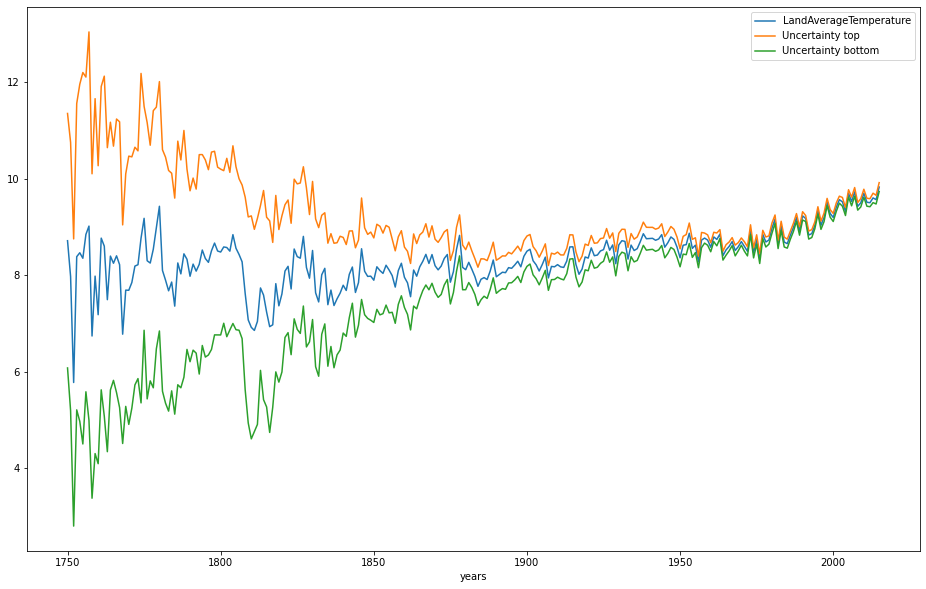

In [27]:
### using Pandas
data.plot(x='years',y=['LandAverageTemperature',
       'Uncertainty top', 'Uncertainty bottom'],\
          figsize=(16,10))

    From the charts you can see, that there is global warming nowadays. 
    The average temperature of Earth surface has the highest value in 
    the last three centuries. The fastest temperature growth occurred 
    in the last 30 years! This worries me, I hope soon humanity will 
    fully switch to ecological sources of energy, that will reduce CO2. 
    If it’s will not happened, we will be in disaster. This charts also 
    have confidence intervals, which shows that measurement of temperatur
    e has become more accurate in the last few years.

### Alternative line chart - if this plotly chart gives us error !
https://www.udemy.com/instructor/communication/qa/14689040/detail?course=3797306

https://www.udemy.com/course/time-series-analysis-real-world-projects-in-python/learn/lecture/26874384#questions/14689040/

# 3.. Analyse Average temperature in each season (previous 14:53 mins)

In [28]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [29]:
global_temp.shape

(3192, 10)

In [30]:
## global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [31]:
global_temp['month'] = global_temp['dt'].dt.month

In [32]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [33]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                 int64
month                                                 int64
dtype: object

In [34]:
### create season feature from 'month'

###  ways to do it.. (Perform Discretization)..


### now using month ,we can extract what my season is :
    There are couple of ways to do it:
        a) using function 
        b) using loops
        c) using discretization (follow DA_airnb_nyc.ipynb) - 8 ways 
        
        Note: For Readibility,functions are better if we have many 
              conditions,but for optimal code perspective,lambda have an edge.

       

In [35]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
    
'''
def get_season(month):
    if 3 <= month <= 5:
       return "Spring"
    elif  6<= month <= 8:
       return "Summer"
    elif  9<= month <= 11:
       return "Autumn"
    else: 
       return "Winter"


'''

'\ndef get_season(month):\n    if 3 <= month <= 5:\n       return "Spring"\n    elif  6<= month <= 8:\n       return "Summer"\n    elif  9<= month <= 11:\n       return "Autumn"\n    else: \n       return "Winter"\n\n\n'

In [36]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [37]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [38]:
years=global_temp['years'].unique()

In [39]:
years

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [40]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    
    current_yr=global_temp[global_temp['years']==year]
    spring_temps.append(current_yr[current_yr['season'] \
           == 'spring']['LandAverageTemperature'].mean())
    
    summer_temps.append(current_yr[current_yr['season'] \
           == 'summer']['LandAverageTemperature'].mean())
    
    autumn_temps.append(current_yr[current_yr['season'] \
           == 'autumn']['LandAverageTemperature'].mean())
    
    winter_temps.append(current_yr[current_yr['season'] \
           == 'winter']['LandAverageTemperature'].mean())
    

In [41]:
### lets make a dataframe of it
season=pd.DataFrame()
season['year']=years
season['spring_temp']=spring_temps
season['summer_temp']=summer_temps
season['autumn_temp']=autumn_temps
season['winter_temp']=winter_temps

In [42]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [43]:
season.columns

Index(['year', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

In [44]:
### since we have plot line chart using pandas already in 
#   ( whether Global warming exists or not)..

### so lets use this time our matplotlib..

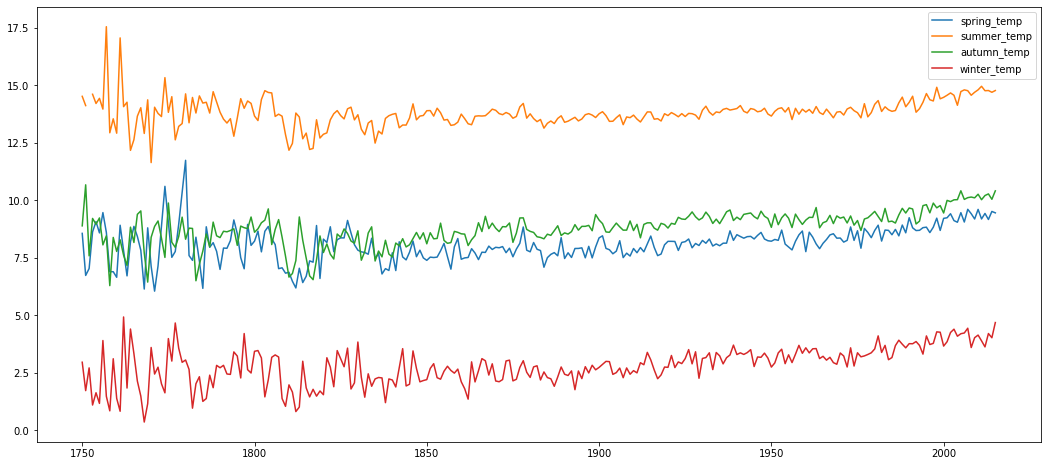

In [45]:
### using matplotlib
import matplotlib.pyplot as plt
 
plt.figure(figsize=(18, 8))

plt.plot(season['year'], season[['spring_temp', \
         'summer_temp', 'autumn_temp', 'winter_temp']] )

plt.legend(['spring_temp', 'summer_temp', \
            'autumn_temp', 'winter_temp'])

In [46]:
'''
import plotly.express as px
fig=px.line(season,x="year",y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title="Average Temperature in Each season", template="plotly_dark")
fig.show()
'''

'\nimport plotly.express as px\nfig=px.line(season,x="year",y=[\'spring_temp\', \'summer_temp\', \'autumn_temp\', \'winter_temp\'],title="Average Temperature in Each season", template="plotly_dark")\nfig.show()\n'

    Is it getting warmer? Yes, it is.

# 4.. Lets Talk about how to Build a Time Series Model..
        Prepare your data for Modelling.. (lets do sampling 
        of data & then pre-processing of data )

In [47]:
### lets read 'GlobalLandTemperaturesByCity.csv'

cities = pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalLandTemperaturesByCity.csv')
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [48]:
cities.shape

(8599212, 7)

#### how to do sampling in data..
    1.. Random sampling
    2.. we say pick first 1M or last 1M points..
    3.. we say we pick data for Top economies.. (Russia ,USA ,
             UK ,India ,France etc.. )
             
         or pick data for some cities of USA , eg 
         ['New York','Los Angeles','San Francisco']

In [49]:
cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [50]:
usa=cities[cities['Country']=='United States']

In [51]:
usa.shape

(687289, 7)

In [52]:
usa['City'].unique()

array(['Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allentown',
       'Amarillo', 'Anaheim', 'Anchorage', 'Ann Arbor', 'Antioch',
       'Arlington', 'Arvada', 'Atlanta', 'Aurora', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Beaumont', 'Bellevue',
       'Berkeley', 'Birmingham', 'Boston', 'Bridgeport', 'Brownsville',
       'Buffalo', 'Burbank', 'Cambridge', 'Cape Coral', 'Carrollton',
       'Cary', 'Cedar Rapids', 'Chandler', 'Charleston', 'Charlotte',
       'Chattanooga', 'Chesapeake', 'Chicago', 'Chula Vista',
       'Cincinnati', 'Clarksville', 'Clearwater', 'Cleveland',
       'Colorado Springs', 'Columbia', 'Columbus', 'Concord',
       'Coral Springs', 'Corona', 'Corpus Christi', 'Costa Mesa',
       'Dallas', 'Dayton', 'Denton', 'Denver', 'Des Moines', 'Detroit',
       'Downey', 'Durham', 'East Los Angeles', 'Edison', 'El Monte',
       'El Paso', 'Elizabeth', 'Escondido', 'Eugene', 'Evansville',
       'Fairfield', 'Fayetteville', 'Flint', 'Fontana',

In [53]:
usa_cities=['New York','Los Angeles','San Francisco']

In [150]:
data2=usa[usa['City'].isin(usa_cities)]

In [102]:
data2.shape

(7193, 7)

In [103]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [151]:
data2=data2[['dt','AverageTemperature']]

In [105]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [152]:
data2.columns = ['Date','Temp']

In [107]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [108]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [153]:
data2['Date']=pd.to_datetime(data2['Date'])

In [110]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [154]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

In [155]:
data2.dropna(inplace=True)

In [156]:
data2.shape

(7073, 2)


    note: for Machine Learning,feature is a columns & we have 
           by-default index as from 0 but for our time series 
           Problem,we have date column our as row-index

In [157]:
data2.set_index('Date',inplace=True)

In [158]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [159]:
data2.tail()

,Temp
Date,
2013-05-01,17.434
2013-06-01,19.759
2013-07-01,20.657
2013-08-01,19.731
2013-09-01,20.471


In [161]:
### lets create a copy of 'data2' dataframe so that we can use it later
df=data2.copy()

### components of time Series (blackboard lecture)
https://medium.com/geekculture/time-series-analysis-a-beginners-guide-81fc2f398784

    Seasonality
    stationary
    Noise
    Variations (seasonal variation / cyclic variations )
    

# 5.. How to find whether data has Seasonality or not..

### we will try to convert our seasonal data into stationary bcz
      Time SEries algos works phenomenal with stationary data..

    lets understand what is seasoanlity ,stationary & couple of Time series Terms..

    seasonality ->> When mean & variance is not constant throughout the data ,
                    ie data has a trend here..
    stationary data ->>  so data that has no trend ie that has constant 
                       mean & std dev throughout data..
    if not stationary then we have to make it stationary using various manipulations..


    Seasonality is opposite of stationary ,ie 
        A time series with a clear seasonal component is referred to as non-stationary...
        
        ie the goal is we have to convert seasonal data into stationary data..
        
        
        
        a)Visualisation approach
    
    (seasonality is all about suppose in each yr in christmas sales goes up) and then down ,
       ie this is a cycle that repeats over time, such as monthly or yearly. 
        

    There are many types of seasonality; for example:

    Time of Day.
    Daily.
    Weekly.
    Monthly.
    Yearly.
    Once seasonality is identified, it can be removed

    The model of seasonality can be removed from the time series. 
    This process is called Seasonal Adjustment, or Deseasonalizing.
    A time series where the seasonal component has been removed is called seasonal stationary.
    A time series with a clear seasonal component is referred to as non-stationary.
https://machinelearningmastery.com/time-series-seasonality-with-python/

​

In [118]:
###  i'm going to create a pivot table to plot the monthly 
# temperatures through the years

data2['month'] = data2.index.month
data2['year'] = data2.index.year

In [73]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [74]:
pivot = data2.pivot_table(values='Temp',index='month',\
                          columns='year')

In [75]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Temperatures')

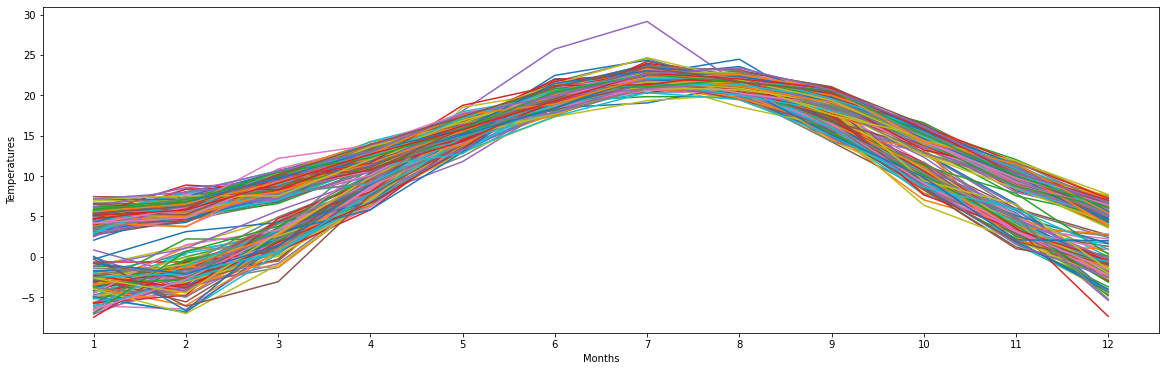

In [76]:
##if we want to plot with respect to time or index , 
#  we can use pivot.plot()

pivot.plot(figsize=(20,6))
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

    looking this graph,we can say this data is seasonal
    The series clearly has some seasonality, the higher temperatures 
    are around b/w June & August and the lower are between December & Feb
    so thats basically a observation that u can drawn and represent to ur client..
    

    Just to make the things clear, I'll merge these lines into 
    just one line, averaging the monthly levels:

In [77]:
### simimarly ,if I have to compute monthly seasonality we can 
#  think of computing mean 

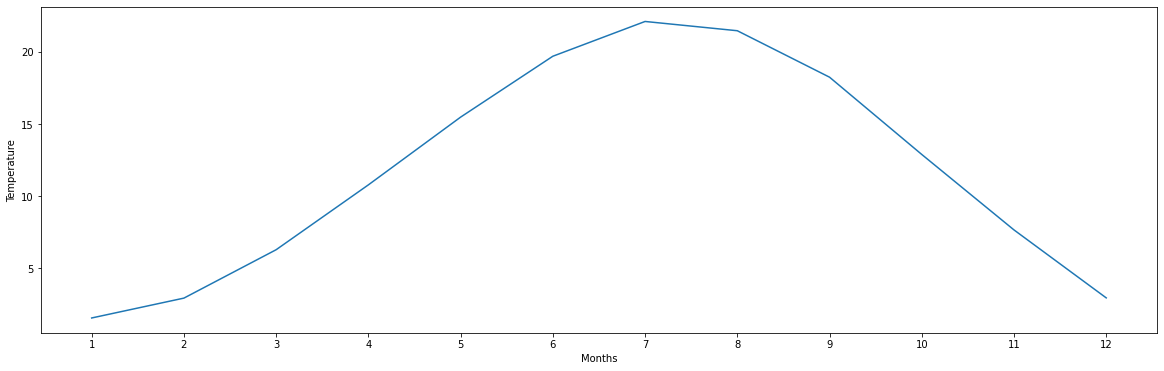

In [78]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

### Blackboard lecture (about p-value)

# 6.. How to find whether data is stationary or not..
            

### ways to find that...
    1.. using data visualisation (lineplot to find out 
                               whats a trend of data)
                               
    2.. Evaluating the descriptive statistics ( ie compute
                 mean & variance of various chunks of data )
https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/

    3.. using statistical Tests (AD-Fuller , KPSS Test )

In [70]:
### what exactly is a stationery data, so data that has no trend no that has constant mean & std dev throughout data..

# if not stationary then we have to make it stationary using various manipulations..

In [ ]:
#note when implementing ARIMA.
#Arima should selected only when your data is not seasonal.
#if we use ARIMA in seasonal data,we dont get better forecast. 

    SARIMA Model (p, d, q)(P, D, Q, S):
    SARIMA stands for Seasonal Auto Regressive Integrated 
    Moving Average, The name scares, but this is not as scary as 
    it seems.

    Non seasonal ARIMA:
    We can split the Arima term into three terms, AR, I, MA:

<AxesSubplot:xlabel='Date'>

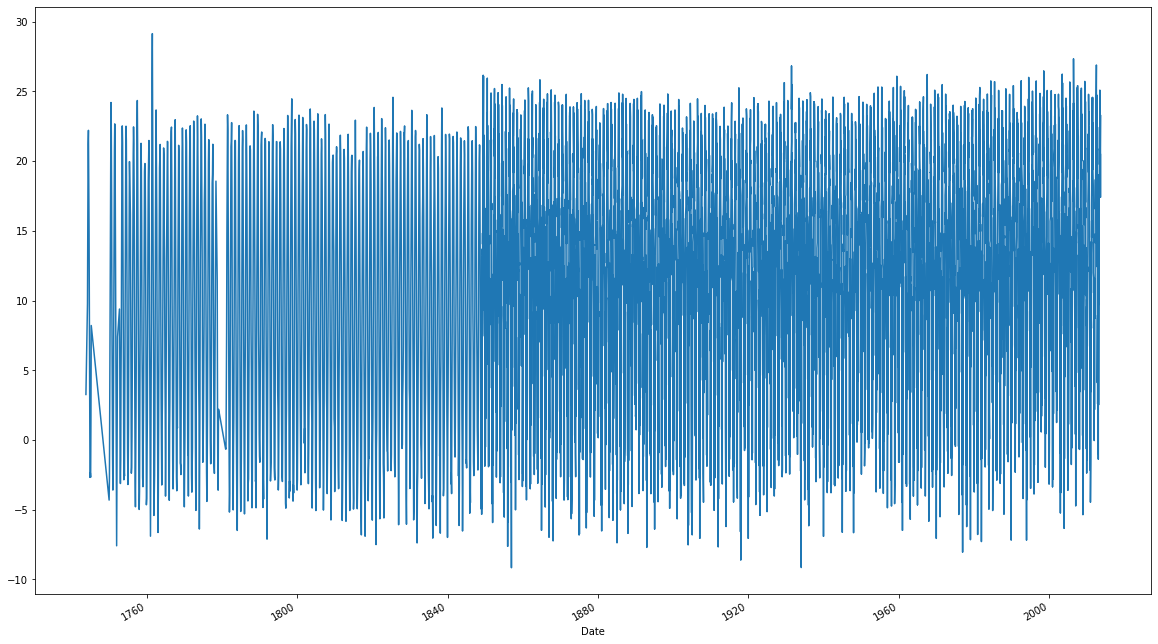

In [116]:
### if u want check whether data is stationary or not..
df['Temp'].plot(figsize=(20,12))

In [ ]:
'''
## seems that data is seasonal in nature..
The spread of the data indicates that there is a 
significant variation in the data. 
To flatten the growing variance, we need to 
transform the data.

A recurring pattern with a defined and predictable regularity dependent on the time of year, week, or day 
is referred to as seasonality.



'''



In [ ]:
'''
## takes almost 3 mins
plt.figure(figsize=(20,10))
import seaborn as sns
sns.lineplot(x=data2.index, y=data2['Temp'])


'''


### lineplot error - students doubt :
https://www.udemy.com/instructor/communication/qa/16701544/detail/?course=3797306

### Stationary doubt :
https://www.udemy.com/instructor/communication/qa/14690780/detail?course=3797306

### What if Data does not turn out be stationary !
https://www.udemy.com/instructor/communication/qa/15460874/detail?course=3797306

In [ ]:
### So after visualising this plot it may be a stationary 
#     data but not sure bcz we have lot of zig-zag motion
### which tells us that mean & variance is not constant 
#     throughout the data... & we will observe in the 1780s, 
### we have little bit spike over here

### so lets use statistical techniques in order to find 
#    out whether data is stationary or not..


#### b.. using statistical Tests
https://analyticsindiamag.com/how-to-make-a-time-series-stationary/


    >> Ad-fuller Test
    >> Kwiatkowski Phillips Schmidt Shin (KPSS) test:

In [79]:
### Testing For Stationarity,Augmented Dickey-Fuller unit test

from statsmodels.tsa.stattools import adfuller

In [80]:
test_result=adfuller(data2['Temp'])
#apply adfuller on data2['Temp']

'''
returns
adf : The test statistic.
pvalue : : p-value
usedlag : The number of lags used.
nobs : The number of observations used for the ADF regression and calculation
    of the critical values.
    
critical values : Critical values for the test statistic at the 1 %, 5 %, and 10 %
    levels. 

'''

'\nreturns\nadf : The test statistic.\npvalue : : p-value\nusedlag : The number of lags used.\nnobs : The number of observations used for the ADF regression and calculation\n    of the critical values.\n    \ncritical values : Critical values for the test statistic at the 1 %, 5 %, and 10 %\n    levels. \n\n'

In [81]:
test_result

(-2.0063893036758156,
 0.2837786583333173,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408726)

In [ ]:
#adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','critical values']
#most imp is p-value
#this is almost similar to Hypothesis testing,

# whereas Null hypo which says Data is not Stationery
#whereas Alternate hypo says data is stationery

#lags are those which are our previous Data

In [ ]:
#if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is 
# true,ie data is stationery

In [ ]:
#Ho: ie null hypoIt is non stationary
#H1: ie Alternate Hypo ,It is stationary
#zip basically combines result,labels

In [82]:
def adfuller_test(Temp):
    result=adfuller(Temp)
    labels = ['ADF Test Statistic','p-value',\
              '#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho),\
               reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, ie we\
          are fail to reject Ho , indicating it is non-stationary ")
    

In [83]:
adfuller_test(data2['Temp'])

ADF Test Statistic : -2.0063893036758156
p-value : 0.2837786583333173
#Lags Used : 35
Number of Observations Used : 7037
weak evidence against null hypothesis, ie we are fail to reject Ho , indicating it is non-stationary 


# 7.. How to make your data stationary :

### Some kind of Error !
https://www.udemy.com/instructor/communication/qa/14903380/detail?course=3797306

#### Now data is not non-stationary ,ie we have to make it stationary..
    using log  ,sq root ,cube root , differencing  ,etc...

In [119]:
data2.head(13)

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849
1849-06-01,21.173,6,1849
1849-07-01,26.159,7,1849
1849-08-01,26.099,8,1849
1849-09-01,21.848,9,1849


In [120]:
data2['Temp'].shift(2)

Date
1849-01-01       NaN
1849-02-01       NaN
1849-03-01     8.819
1849-04-01     9.577
1849-05-01    11.814
               ...  
2013-05-01    13.506
2013-06-01    15.996
2013-07-01    17.434
2013-08-01    19.759
2013-09-01    20.657
Name: Temp, Length: 7073, dtype: float64

In [121]:
data2['Temp'] - data2['Temp'].shift(2)

Date
1849-01-01      NaN
1849-02-01      NaN
1849-03-01    2.995
1849-04-01    4.127
1849-05-01    3.020
              ...  
2013-05-01    3.928
2013-06-01    3.763
2013-07-01    3.223
2013-08-01   -0.028
2013-09-01   -0.186
Name: Temp, Length: 7073, dtype: float64

In [162]:
# why taken shift(12) , bcz basically year has 12 month 
#      cycle ,ie order to remove seasonal component..

# In previous diagram of pivot table , we have figured out 
#  that we have yearly seasonality.. , lets use shift(12) to 
# remove seasonality


df['first_diff_temp']=df['Temp']-df['Temp'].shift(12)

### Why is df.shift (12) used to make the series stationary?
https://www.udemy.com/instructor/communication/qa/14891524/detail?course=3797306

https://www.udemy.com/instructor/communication/qa/15094574/detail?course=3797306

https://www.udemy.com/instructor/communication/qa/15176108/detail?course=3797306


In [123]:
df.head()

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [124]:
df.head(20)

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [125]:
## Again test dickey fuller test on df['first_diff_temp']
adfuller_test(df['first_diff_temp'].dropna())

ADF Test Statistic : -21.239650404910797
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 7025
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [115]:
#now our p-value is less than 0.05 which basically says we are
#  rejecting null hypo and accepting alternate hypo
#ie data is stationery
#if p-value is almost 0,then we have a wonderful stationary graph

In [116]:
#once data becomes stationary,we have to stop there..

In [163]:
df.head()

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


<AxesSubplot:xlabel='Date'>

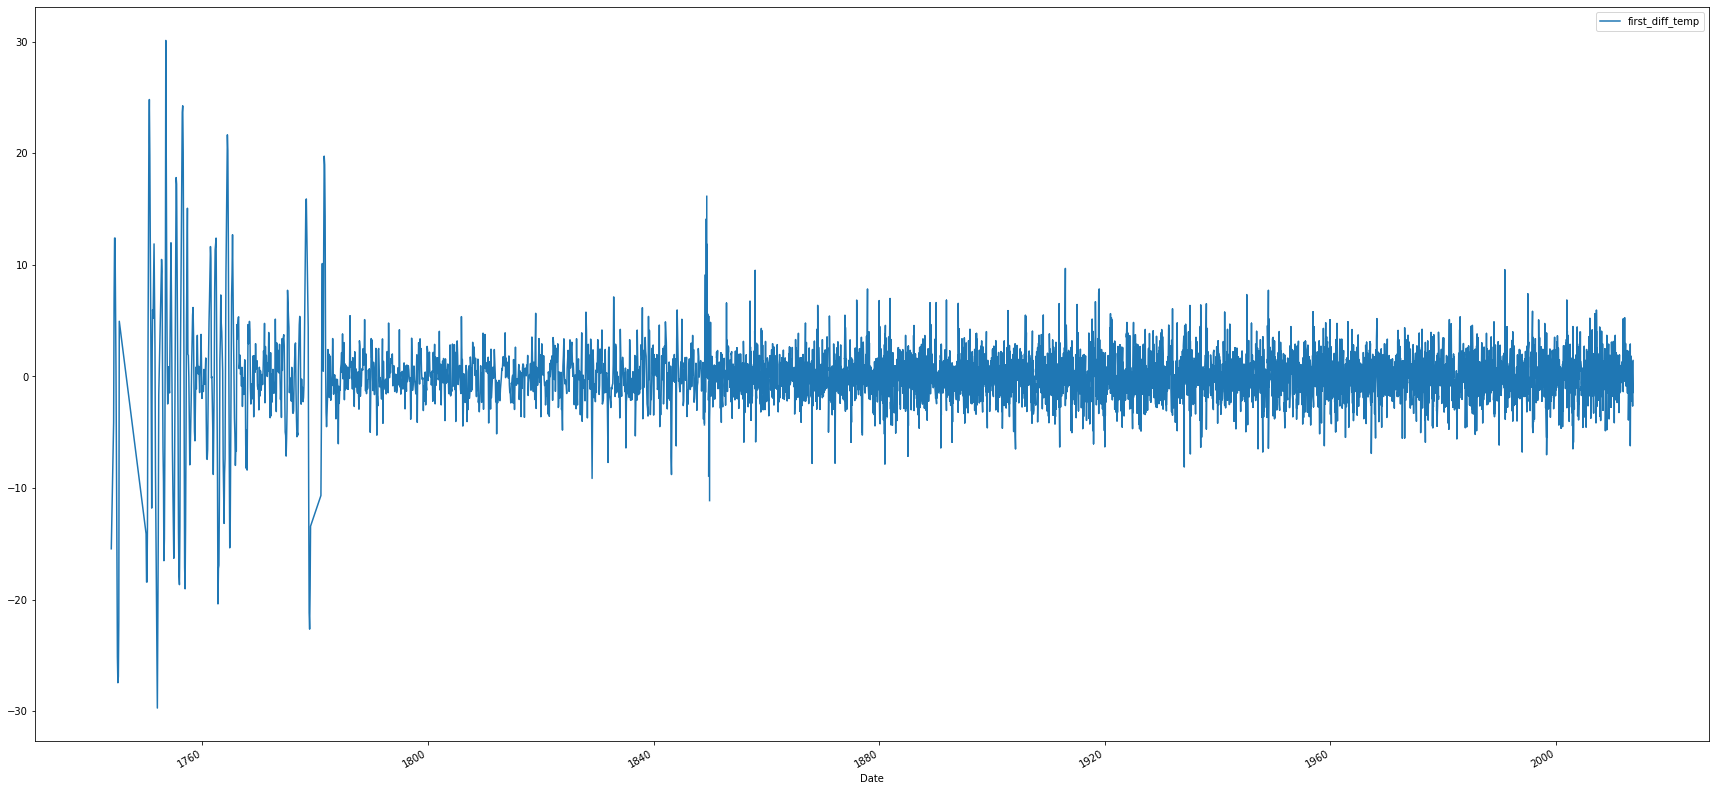

In [164]:
df[['first_diff_temp']].plot(figsize=(30,15))

### Stationary data
https://www.udemy.com/instructor/communication/qa/15265718/detail?course=3797306

### seaborn lineplot error:
https://www.udemy.com/instructor/communication/qa/17473598/detail?course=3797306

In [119]:
#note when implementing ARIMA,
#Arima should selected only when your data is not seasonal
#if we use ARIMA in seasonal data,we dont get better forecast

In [128]:
df.head()

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [165]:
df=df[['first_diff_temp']]

In [166]:
df.head()

,first_diff_temp
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN


In [167]:
df.dropna(inplace=True)

# 8.. Data Modelling..
    Building a basic moving Avg model ie 

    types of models in Time-Series :
     1.Base line model
     2.Exponential model
     3.AR model
     4.MA model
     5.ARIMA model
     6.SARIMA model(Seasonal ARIMA)

    smoothening time-series
    smoothing is basically done by Moving Avearge
    MA highly used in Stock Market Analysis as well as in 
    Some business as well

In [168]:
### ### Smoothening your series using moving average
## Rolling is just like a window that you are going to consider
## or I can say its a window that we have considered for Moving average,
## lets say 5 is the window size or 5 is the business period

df['first_diff_temp'].rolling(window=5).mean()

##### lets day u r expertise in any area & u know within 7 days, 
# the maximum value is the true reflector of our business as 
#  we are in high growth era

##### & minimum value is a true reflector of our baseline, 
# so in such case instead of mean , u can call min & max function

### this technique has already used lots of time in Stock Market 
# & stock Analyst used basically Moving average to remove such noise in data..

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_diff_temp, Length: 7061, dtype: float64

### Rolling..
https://www.udemy.com/instructor/communication/qa/14931172/detail?course=3797306

https://www.udemy.com/instructor/communication/qa/15265866/detail?course=3797306

In [177]:
df['first_diff_temp'].rolling(window=5).mean().shape

(7061,)

In [178]:
df['Predictions']=df['first_diff_temp'].\
            rolling(window=5).mean()

In [179]:
df.head(2)

,first_diff_temp,Predictions
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN


In [180]:
df.dropna(inplace=True)

In [183]:
df.columns=['actual_Temp','forecast_Temp']

In [184]:
df.head(2)

,actual_Temp,forecast_Temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106


In [172]:
'''

value=pd.DataFrame(df['first_diff_temp'])
temp_df=pd.concat([value,df['first_diff_temp'].rolling(window=5).mean()],axis=1)
temp_df
temp_df.columns=['actual_Temp','forecast_Temp']
temp_df.dropna(inplace=True)
temp_df.head(20)


'''

,actual_Temp,forecast_Temp
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


In [181]:
from sklearn.metrics import mean_squared_error

In [182]:
### then check accuracy using RMSE..
np.sqrt(mean_squared_error(df['actual_Temp'],\
                           df['forecast_Temp']))

2.3934235122562058

### MSE doubt &  future data doubt
https://www.udemy.com/instructor/communication/qa/14269664/detail?course=3797306

    why np.sqrt, bcz mean_squared_error gives square of error , 
       and then by calling np.sqrt we get actual error
    if we have outlier in data, This error will increase, 
        dats why we have to deal with outlier
    Using moving_avg (MA), we can say using this basic technique 
    we are getting error of 2.4 degree celsius every day, it means 
    error of +-4 is going to happen in your prediction.

# 9.. Lets Build ARIMA Model..

In [139]:
#### for this use-case we will come to ARIMA 

In [187]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [185]:
df.head()

,actual_Temp,forecast_Temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


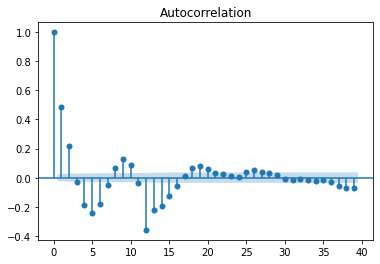

In [188]:
### to get rid of 2 plots of auto-corelation & co-relation ,
#we can use plt.show()

plot_acf(df['actual_Temp'].dropna())
plt.show()
##q--3

### about blue area:
    There is a little bit statistics involved over here...



    This blue area is exactly a Confidence interval By default, this is set to a 95% confidence interval, which says that you are 95% confident that the mean for the entire population falls within this range.

### ACF Plots !
https://www.udemy.com/instructor/communication/qa/15265524/detail?course=3797306

### Get rid of 2 ACF Plots
https://www.udemy.com/instructor/communication/qa/15265874/detail?course=3797306

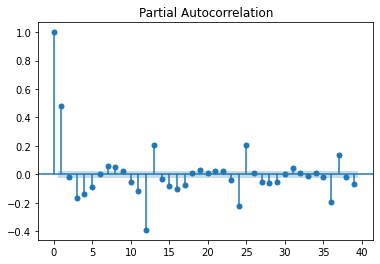

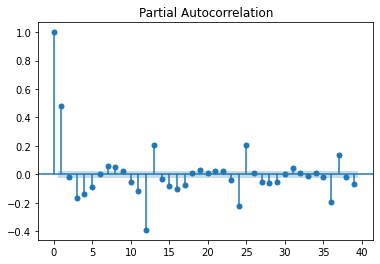

In [148]:
plot_pacf(df['actual_Temp'].dropna())
##p--2

In [189]:
df=df[['actual_Temp']]

In [190]:
df.dropna(inplace=True)

In [191]:
df.shape

(7057, 1)

In [192]:
training_data=df[0:6000]
test_data=df[6000:]

### create test that is basically unseen to our model, 
#  or which is basically is used for evalaution

### about Future data !
https://www.udemy.com/instructor/communication/qa/15998930/detail?course=3797306

In [193]:
from warnings import filterwarnings
filterwarnings('ignore')


In [194]:
from statsmodels.tsa.arima_model import ARIMA

In [195]:
### arima= ARIMA(training_data,order=(p,d,q))

arima= ARIMA(training_data,order=(2,1,3))

### value of d
https://www.udemy.com/instructor/communication/qa/14727138/detail?course=3797306

https://www.udemy.com/instructor/communication/qa/15000090/detail?course=3797306

In [196]:
### then doing model.fit ie fitting our model to data

model=arima.fit()

In [197]:
model.aic

27458.85246108663

### What is AIC
https://www.udemy.com/instructor/communication/qa/15021042/detail?course=3797306

In [198]:
len(test_data)

1057

In [199]:
len(model.forecast(steps=len(test_data))[0])

1057

In [200]:
model.forecast(steps=len(test_data))

(array([ 0.4617737 ,  0.22723779, -0.04790332, ...,  0.03678432,
         0.03679384,  0.03680336]),
 array([2.38161996, 2.5480657 , 2.64592804, ..., 2.84533045, 2.84533045,
        2.84533045]),
 array([[-4.20611564,  5.12966305],
        [-4.76687921,  5.22135478],
        [-5.23382698,  5.13802034],
        ...,
        [-5.53996089,  5.61352952],
        [-5.53995137,  5.61353904],
        [-5.53994184,  5.61354857]]))

In [201]:
pred= model.forecast(steps=len(test_data))[0]
pred

array([ 0.4617737 ,  0.22723779, -0.04790332, ...,  0.03678432,
        0.03679384,  0.03680336])

### Getting predictions in detail..
https://www.udemy.com/instructor/communication/qa/14510858/detail?course=3797306


### About Steps..
https://www.udemy.com/instructor/communication/qa/15267338/detail?course=3797306

In [163]:
len(pred)

1061

In [202]:
np.sqrt(mean_squared_error(test_data,pred))

1.5133486042397835

In [ ]:
### now u will see it is better than MA model that we have 
#created as Error(1.5 degree centigrade) has decreased that shows arima model
### it is much more good in such sceanario rather than Baseline 

### various performance metrics (MSE, RMSE, MAE, MAPE) :
https://www.udemy.com/instructor/communication/qa/15998948/detail?course=3797306

# 10.. Lets do model Tuning or Hyperparameter Tuning..

### model Tuning or Hyperparameter Tuning or choosing the best pair of (p,d,q

In [165]:
#### now define hyper-para=meters 
p_values=range(0,4)
d_values=range(0,3)
q_values=range(0,4)


In [166]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### so we are just trying to provide pairs of (p,d,q) & 
#   whichever pair will give me least error i will consider that pair, 
## approx takes somewhere 20 mins & more

for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df[0:6000]
            test=df[6000:]
            predictions=[]
            ### now we have train & test data that we can pass to our algorithm
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    ##displacement=0
                    model=arima.fit(disp=0)
                    
                    ## Role of disp(displacement) is to control 
                    # the frequency of the output during the iterations. ,
                    ## 
                    
                    pred_y=model.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error, order))
                except:
                    continue


MSE is 2.283672928281577 with order (0, 0, 0)
MSE is 2.5227585624956 with order (0, 0, 1)
MSE is 2.2953713111799883 with order (0, 0, 2)
MSE is 2.385539455012164 with order (0, 0, 3)


### disp parameter !
https://www.udemy.com/instructor/communication/qa/15747814/detail?course=3797306

### Time taken by this nested for loop..
https://www.udemy.com/instructor/communication/qa/14531922/detail?course=3797306


### The following steps calculate the running time of a program or section of a program.
    Store the starting time before the first line of the program executes.
    Store the ending time after the last line of the program executes.
    Print the difference between start time and end time.
    

https://www.studytonight.com/post/calculate-time-taken-by-a-program-to-execute-in-python


In [168]:
# starting time
start = time.time()

# end time
end = time.time()

In [169]:
start-end

0.0